# Prae-1 (EPIC 211916756) light curve overview

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
%run ../src/core.py

## Read in and clean the data

We also mask out some clear outliers, namely the points with normalised flux greater than 1.004 (a limit identified by eye).

In [3]:
d  = pf.getdata(LCFILE, 1)

time = d.time
flux_raw = d.flux_1
trend_t  = d.trend_t_1 - nanmedian(d.trend_t_1)
trend_p  = d.trend_p_1 - nanmedian(d.trend_p_1)
flux = flux_raw - trend_t - trend_p
flux /= nanmedian(flux)
mf = nanmedian(flux_raw)

mask_q = d.quality == 0
mask_f = isfinite(flux)
mask_o = flux < 1.004
mask   = mask_f & mask_o

tid_arr  = np.round((time - tc) / p).astype(np.int)
tid_arr -= tid_arr.min()
tids     = unique(tid_arr)

phase = p*(fold(time, p, tc, shift=0.5) - 0.5)
pmask = abs(phase) < 6*0.5*dur
phases  = [phase[tid_arr==tt]  for tt in unique(tids)]
times   = [time[tid_arr==tt]   for tt in unique(tids)]
fluxes  = [flux[tid_arr==tt]   for tt in unique(tids)]

## Plot the light curve and trends

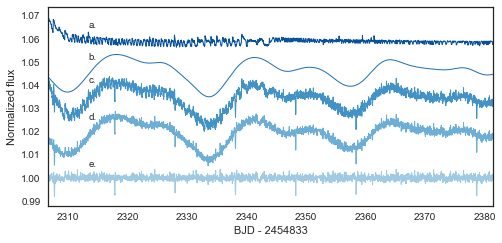

In [4]:
sb.set_palette("Blues_r", n_colors=7)
fig,ax = subplots(1,1, figsize=(AAPGW,AAOCW))
sb.set_context('paper')
ax.plot(time[mask], 0.059+N(trend_p[mask] + mf), lw=1, label='Position trend')
ax.plot(time[mask], 0.047+N(trend_t[mask] + mf), lw=1, label='Time trend')
ax.plot(time[mask], 0.035+N(flux_raw[mask]), lw=1, label='Raw flux')
ax.plot(time[mask], 0.020+N(flux_raw-trend_p)[mask], lw=1, label='Raw flux - position trend')
ax.plot(time[mask], 0.000+flux[mask], lw=1, label='Detrended flux')
[ax.text(2313.5, y, l) for l,y in zip('e. d. c. b. a.'.split(), [1.005, 1.025, 1.041, 1.051, 1.065])]
setp(ax, xlim=(time[[0,-1]]), ylabel='Normalized flux', xlabel='BJD - 2454833')
fig.tight_layout()
fig.savefig(join(DPLOT, 'lc_overview.pdf'))

## Plot the individual transits

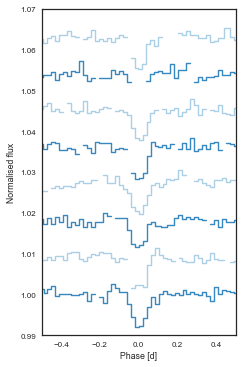

In [5]:
sb.set_palette("Blues_r", n_colors=2)
fig,ax = subplots(1, 1, figsize=(AAOCW,1.5*AAOCW))
for i,(ph,fl) in enumerate(zip(phases,fluxes)):
    ax.plot(ph, 0.009*i+fl, drawstyle='steps-mid')
setp(ax, xlim=(-0.5,0.5), ylim=(0.99, 1.07), xlabel='Phase [d]', ylabel='Normalised flux')
fig.tight_layout()
fig.savefig(join(DPLOT, 'lc_individual_transits.pdf'))

---

<center> &copy; 2017 Hannu Parviainen </center>